To run this example locally, [install Ploomber](https://docs.ploomber.io/en/latest/get-started/install.html) and execute: `ploomber examples -n guides/monitoring`

To start a free, hosted JupyterLab: [![binder-logo](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ploomber/binder-env/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Fploomber%252Fprojects%26urlpath%3Dlab%252Ftree%252Fprojects%252Fguides/monitoring%252FREADME.ipynb%26branch%3Dmaster)

Found an issue? [Let us know.](https://github.com/ploomber/projects/issues/new?title=guides/monitoring%20issue)

Have questions? [Ask us anything on Slack.](https://ploomber.io/community/)


## Get a sample pipeline

<!-- start description -->
To show the capabilities we'll run our pipeline monitoring through a pre-built Ploomber template: ml-basic.
<!-- end description -->

In [5]:
%%bash
ploomber plot

Loading pipeline...
Plot saved at: pipeline.png


100%|██████████| 4/4 [00:00<00:00, 2075.87it/s]


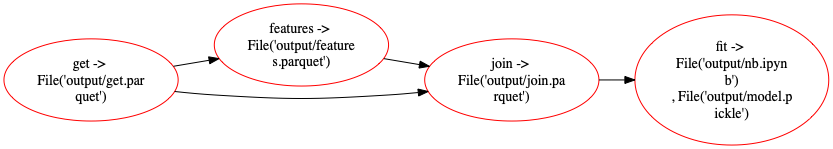

In [2]:
# If using jupyter, you can show the plot with this code:
from IPython.display import Image
Image(filename='pipeline.png')

# otherwise open the pipeline.png file directly

Let's take a look at the `pipeline.yaml`:

```yaml
# Content of pipeline.yaml
tasks:
  - source: tasks.get
    product: output/get.parquet

  - source: tasks.features
    product: output/features.parquet

  - source: tasks.join
    product: output/join.parquet

  - source: fit.py
    name: fit
    product:
        nb: output/nb.html
        model: output/model.pickle

```

## Setup your API key

Go to the cloud and setup your key, add your email address:

https://main.d3mpv0f3dqco4e.amplifyapp.com/register

In [3]:
%%bash
ploomber cloud set-key $YOUR_API_KEY

Key was stored 2GvfdlZEHCEVCmBbRHxeOQ


In [4]:
%%bash
ploomber cloud get-key

This is your cloud API key: 2GvfdlZEHCEVCmBbRHxeOQ


## Run your pipeline
We can get all of our pipeline execution history by running the command below, we can check out if we have anything that was errored out

In [5]:
%%bash
ploomber cloud get-pipelines

pipeline_name    updated                    status    pipeline_id
---------------  -------------------------  --------  ------------------------
ml               16 days ago (Feb 25, 2022  finished  c2185c1d-8879-4b05-a55a-
                 at 14:35)                            ec1259b304bf
ml               16 days ago (Feb 25, 2022  finished  b587240b-9fbd-4add-8555-
                 at 14:38)                            02759541ae08
ml               2 days ago (Mar 11, 2022   finished  f4f51628-1415-47f7-bacc-
                 at 13:56)                            9adc68db61a5
ml               an hour ago (Mar 13, 2022  finished  f24a9ba7-9ece-4b74-8942-
                 at 13:07)                            4eafe3a93b5b
ml               an hour ago (Mar 13, 2022  finished  48c59e84-7899-428c-92d9-
                 at 13:10)                            8e93ed1f09d1
monitoring       49 minutes ago (Mar 13,    finished  10bb67b3-860d-4491-b803-
                 2022 at 14:13)               

now let's run the sample ml-basic pipeline and see how it's tracked

In [6]:
%%sh --no-raise-error
ploomber build

Loading pipeline...
name      Ran?      Elapsed (s)    Percentage
--------  ------  -------------  ------------
fit       True          4.88694           100
get       False         0                   0
features  False         0                   0
join      False         0                   0


/Users/ido.michael/opt/anaconda3/lib/python3.9/site-packages/ploomber/cli/build.py:62: UserWarning: b'Error: Non cloud users can monitor up to 2 pipelines simultaneously'
  warnings.warn(res)
Building task 'fit': 100%|██████████| 1/1 [00:04<00:00,  4.89s/it]
/Users/ido.michael/opt/anaconda3/lib/python3.9/site-packages/ploomber/cli/build.py:98: UserWarning: b'Error: Non cloud users can monitor up to 2 pipelines simultaneously'
  warnings.warn(res)


Seeing how a successful pipeline looks like. You can also view the alerting mechanism - check out your email report!

In [ ]:
%%bash
ploomber cloud get-pipelines latest

![working-monitoring](https://ploomber.io/images/doc/monitoring-pipeline.png)

In [8]:
from pathlib import Path

path = Path('fit.py')
clean = path.read_text()

# add a print statement at the end of 3-clean.py
path.write_text(clean + """
raise ValueError("This is a sample error in the model fit")
""")

1127

In [9]:
%%sh --no-raise-error
ploomber build

Loading pipeline...


/Users/ido.michael/opt/anaconda3/envs/projects/lib/python3.10/site-packages/ploomber/cli/build.py:62: UserWarning: b'Error: Non cloud users can monitor up to 2 pipelines simultaneously'
  warnings.warn(res)
Building task 'fit': 100%|██████████| 1/1 [00:05<00:00,  5.72s/it]
/Users/ido.michael/opt/anaconda3/envs/projects/lib/python3.10/site-packages/ploomber/cli/build.py:85: UserWarning: b'Error: Non cloud users can monitor up to 2 pipelines simultaneously'
  warnings.warn(res)

=============================== DAG build failed ===============================
- NotebookRunner: fit -> MetaProduct({'model': File('output/model.pickle'), 'nb': File('output/nb.ipynb')}) -
--- /Users/ido.michael/Documents/ploomber/projects/guides/monitoring/fit.py ----

---------------------------------------------------------------------------
Exception encountered at "In [10]":
---------------------------------------------------------------------------
ValueError                                Traceback (most

### Check your email
You should have a similar email stating a pipeline errored out and the error trace.

![errored-pip-monitoring](https://ploomber.io/images/doc/monitoring-pipeline.png)

You can also get all of the active pipelines, we'll see only ones that didn't finished yet.

In [10]:
%%bash
ploomber cloud get-pipelines active

status    pipeline_id               updated                  pipeline_name
--------  ------------------------  -----------------------  ---------------
error     403b54be-d32c-4135-adcf-  19 minutes ago (Mar 13,  monitoring
          a60f714f0f6f              2022 at 14:45)
error     4776b94c-b917-4fdf-832e-  10 minutes ago (Mar 13,  monitoring
          c5fb44fab2bb              2022 at 14:54)


We can also delete errored pipelines if we'd like to for instance we can run the command below to delete the ml pipeline.


In [11]:
%%sh --no-raise-error
ploomber cloud delete-pipeline 9448f7ee-cc90-4e8a-8539-98e2ed0b4061

b"Error: Pipeline 9448f7ee-cc90-4e8a-8539-98e2ed0b4061 doesn't exist"


# Conclusion
This short guide allows you to track your pipelines, it's especially relevant when running parallel/long executions and you want to be notified once your workflow has finished.

For more information you can check out the official guide: https://docs.ploomber.io/en/latest/cloud/index.html